# **Estimation of Obesity Levels Based On Eating Habits and Physical Condition**

*Gússem Yahia-Cheikh, Sara Díez and María Colomer*

## 1. Importing the Dataset

First we'll load and explore the obesity dataset to understand its structure, datatypes and target distribution. The dataset contains information about eating habits and physical condition.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.info() #general view of the types of entries of the features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [4]:
df.isna() #Checking if there's any null value, but when obtaining the dataset we knew that it didn't had any.

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity_level
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2107,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2108,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2109,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


**Target Distribution Analysis**

The value counts show how many samples belong to each obesity level class. This reveals:
- The classes are somewhere around balanced.
- We'll need stratified sampling to mantain class proportions in train/test split.

In [5]:
df['Obesity_level'].value_counts()

Obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

## 2. Scrubbing the Data

As seen before we're working with 9 categorical featues, so it's crutial to determine how we're going to convert them to make the dataset more suitable for the further modelling steps.

It's crutial since proper convertion preserves the relationships in the data and if not done, it can introduce bias or even loose information when modelling.

The planning is the following:
1. **Identify the categorical features**
2. **Encode the categorical variables** - convert the yes/no entries into (0,1) values (and also `Gender`)
3. **Handle ordinal features** - preserve ordering (e.g., 'never' < 'sometimes' < 'always')
4. **One-Hot Encoding** the nominal features - only the `MTRANS` feature

**Step 1: Identify Categorical Columns/Features**

In [6]:
categorical_cols=df.select_dtypes(include='object').columns
for col in categorical_cols:
    print("\n" + "="*60)
    print(f"Column: {col}")
    print(df[col].value_counts())


Column: Gender
Gender
Male      1068
Female    1043
Name: count, dtype: int64

Column: family_history_with_overweight
family_history_with_overweight
yes    1726
no      385
Name: count, dtype: int64

Column: FAVC
FAVC
yes    1866
no      245
Name: count, dtype: int64

Column: CAEC
CAEC
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

Column: SMOKE
SMOKE
no     2067
yes      44
Name: count, dtype: int64

Column: SCC
SCC
no     2015
yes      96
Name: count, dtype: int64

Column: CALC
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

Column: MTRANS
MTRANS
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Column: Obesity_level
Obesity_level
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overwei

**Step 2: Encode Binary Features**

Binary features (yes/no, female/male) are mapped to 0/1. Thiss applies to: `family_history_with_overweight`, `FAVC`, `SMOKE`, `SCC`, and `Gender`.

In [7]:
binary_map={'yes':1,'no':0}

binary_cols=['family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

for col in binary_cols:
    df[col]=df[col].str.lower().map(binary_map)

#Gender Column

df['Gender']=df['Gender'].map({'Female':0,'Male':1})

# We check ou yeah
for col in ['Gender']+binary_cols:
    print(col, ': unique values', df[col].unique())

Gender : unique values [0 1]
family_history_with_overweight : unique values [1 0]
FAVC : unique values [0 1]
SMOKE : unique values [0 1]
SCC : unique values [0 1]


**Step 3: Encode Ordinal Features**
Ordinal features have a natural ranking. We preserve this order:
`CAEC` (food consumption frequency) and `CALC` (alcohol consumption):
- `'no'` → `0`
- `'sometimes'` → `1`
- `'frequently'` → `2`
- `'always'` → `3`

This encoding respects the hierarchy and helps models learn relationships.

In [8]:
df['CAEC']=df['CAEC'].str.lower()
df['CALC']=df['CALC'].str.lower()

ordinal_map={'no':0, 'sometimes':1, 'frequently':2, 'always':3}

df['CAEC']=df['CAEC'].map(ordinal_map)
df['CALC']=df['CALC'].map(ordinal_map)

#Checking

print('unique values CAEC', df['CAEC'].unique())
print('unique values CALC', df['CALC'].unique())

unique values CAEC [1 2 3 0]
unique values CALC [0 1 2 3]


**Step 4: One-Hot Encode Nominal Features**

`MTRANS` (transportation mode) has no natural order, so we use one-hot encoding:
- Each unique category gets its own binary column
- `drop_first=True` removes one column to avoid multicollinearity

In [9]:
df=pd.get_dummies(df, columns=['MTRANS'], drop_first=True)

In [10]:
mtrans_ohe=[c for c in df.columns if c.startswith('MTRANS_')]

In [11]:
print(mtrans_ohe, '\n', df.shape)

['MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking'] 
 (2111, 20)


In [12]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Obesity_level,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,Normal_Weight,False,False,True,False
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,Normal_Weight,False,False,True,False
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,Normal_Weight,False,False,True,False
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,Overweight_Level_I,False,False,False,True
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,Overweight_Level_II,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,Obesity_Type_III,False,False,True,False
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,Obesity_Type_III,False,False,True,False
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,Obesity_Type_III,False,False,True,False
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,Obesity_Type_III,False,False,True,False


In [13]:
df.to_csv('obesity_target_complete.csv', index=False)

In [2]:
df7=pd.read_csv('obesity_target_complete.csv')

## 3. Exploratory Data Analysis (EDA)

Once our data has been imported and scrubbed, it is the turn to carry out the Exploratory Data Analysis (EDA).

This is a crucial step toward developing our model as prior to it we need to:
- Understand the structure of our data.
- Discover patterns and relationships.
- Asses data's quality.

In this section we evolved the corresponding Target Distribution Plot, Boxplots and the Correlation matrix.

### 3.1. Target Distribution Plot

It's goal is to visually show us how the target variable is distributed.

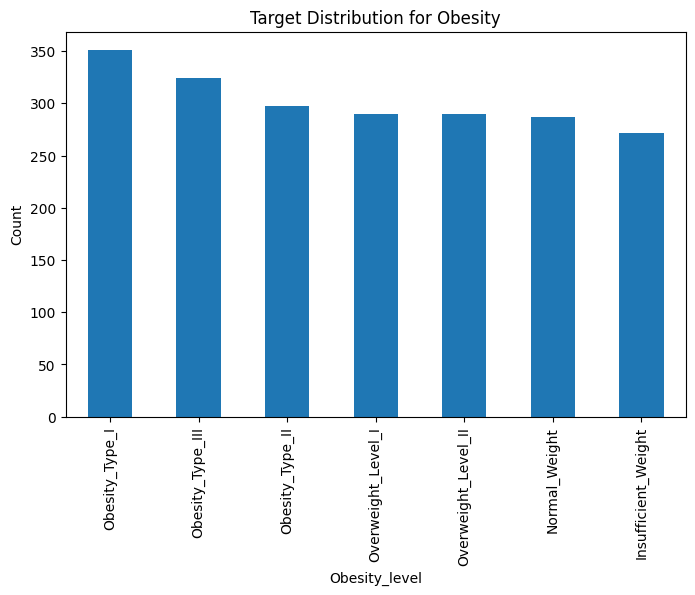

In [15]:
import matplotlib.pyplot as plt

counts = df7['Obesity_level'].value_counts()
plt.figure(figsize=(8, 5))
counts.plot(kind='bar')
plt.title(f"Target Distribution for Obesity")
plt.xlabel('Obesity_level')
plt.ylabel("Count")
plt.show()

### 3.2. Boxplot

In this section we developed two types of boxplots for our dataset. One that plots each feature by `Obesity_level` and the second which plots all numeric features together.

#### 3.2.1. Boxplots by `Obesity_level`

This kind of boxplot is aimed to compare distributions accross the classes on our dataset.

/var/folders/_1/mzpv4xr96cx472xf0zm5699r0000gn/T/ipykernel_8757/2585772417.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 5))


<Figure size 800x500 with 0 Axes>

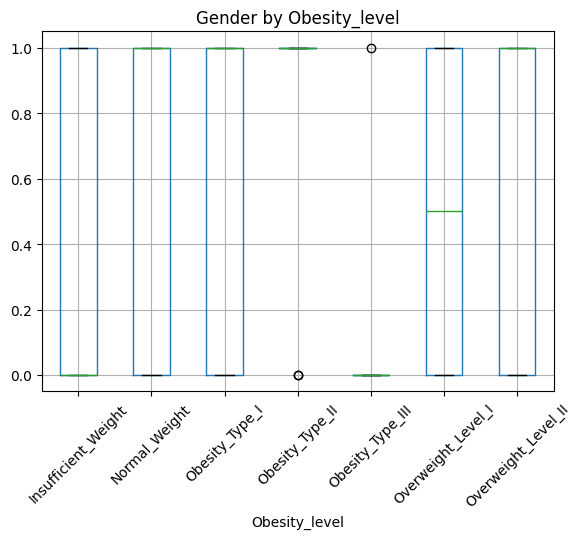

<Figure size 800x500 with 0 Axes>

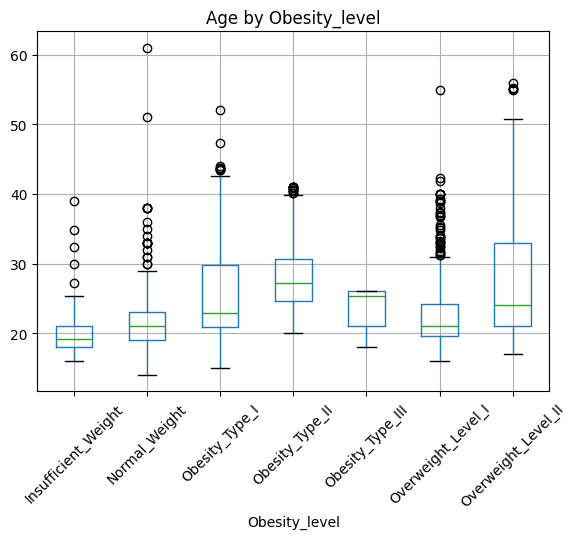

<Figure size 800x500 with 0 Axes>

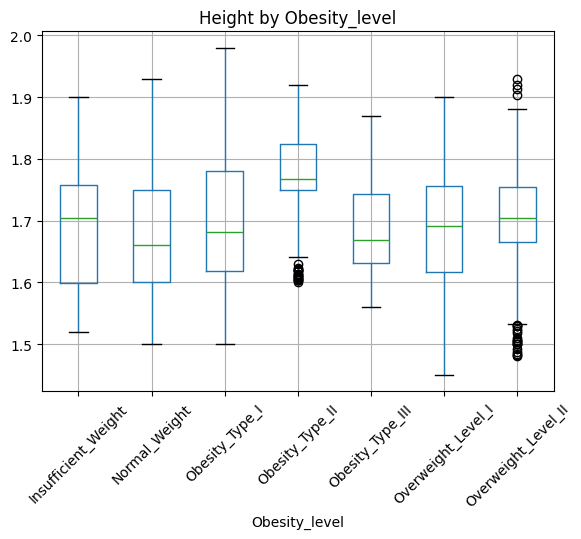

<Figure size 800x500 with 0 Axes>

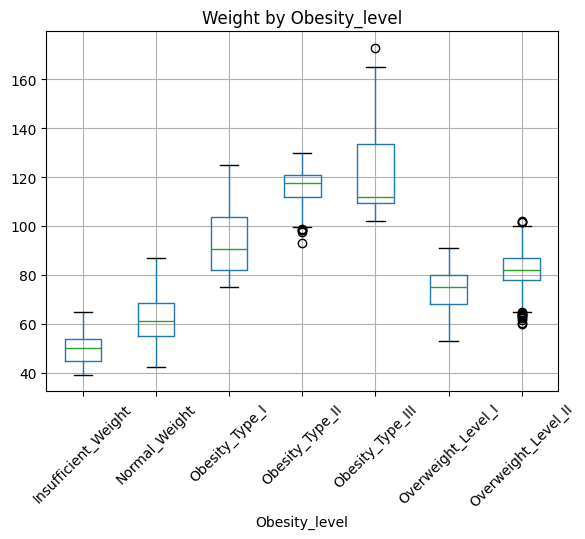

<Figure size 800x500 with 0 Axes>

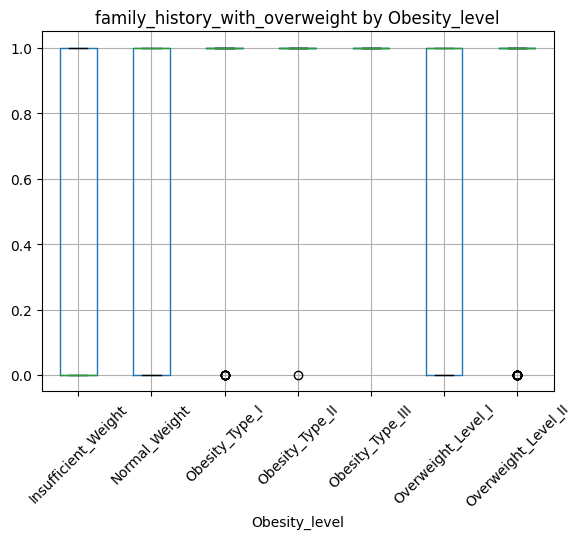

<Figure size 800x500 with 0 Axes>

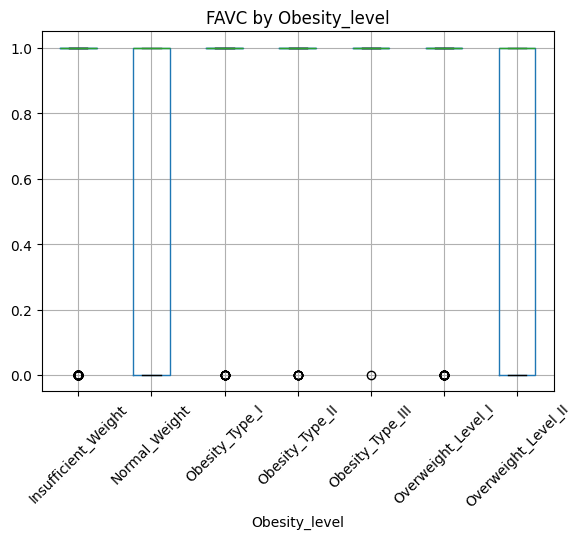

<Figure size 800x500 with 0 Axes>

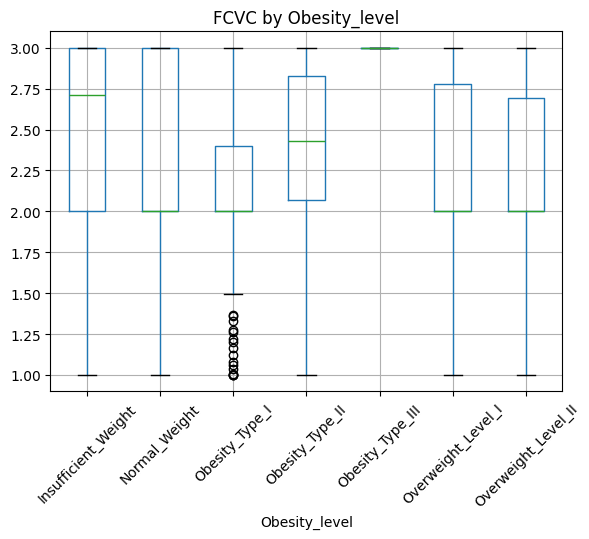

<Figure size 800x500 with 0 Axes>

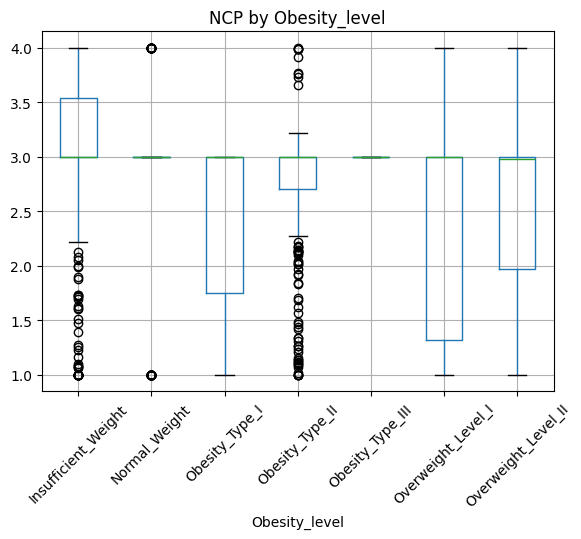

<Figure size 800x500 with 0 Axes>

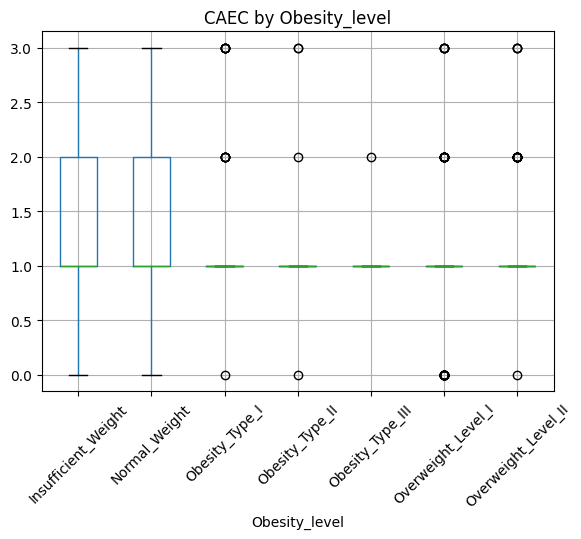

<Figure size 800x500 with 0 Axes>

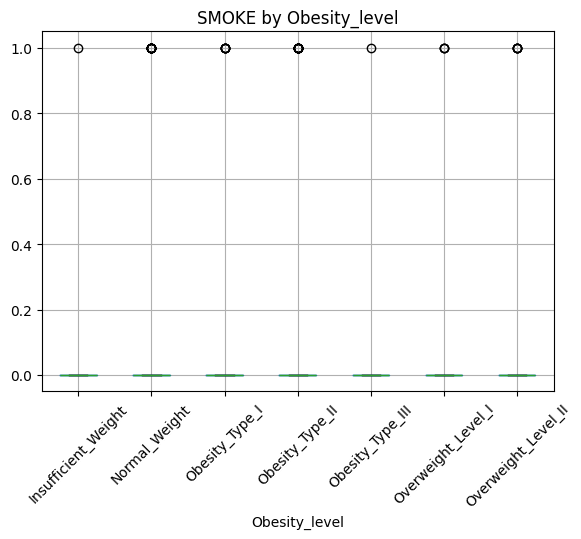

<Figure size 800x500 with 0 Axes>

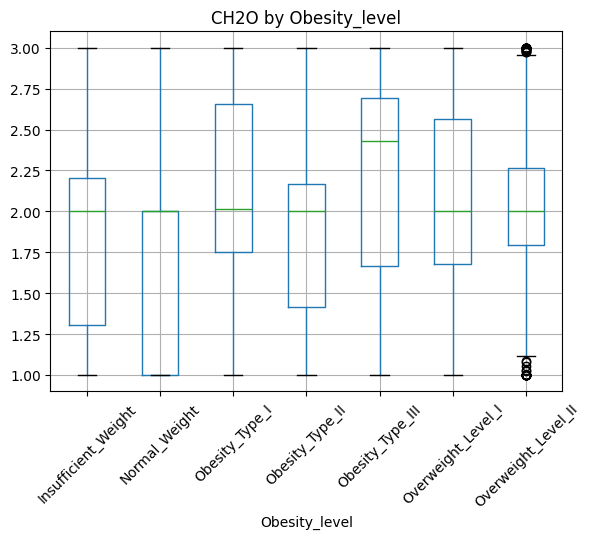

<Figure size 800x500 with 0 Axes>

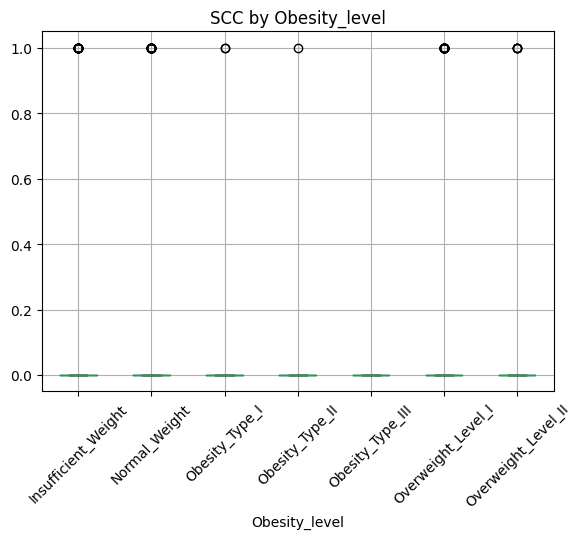

<Figure size 800x500 with 0 Axes>

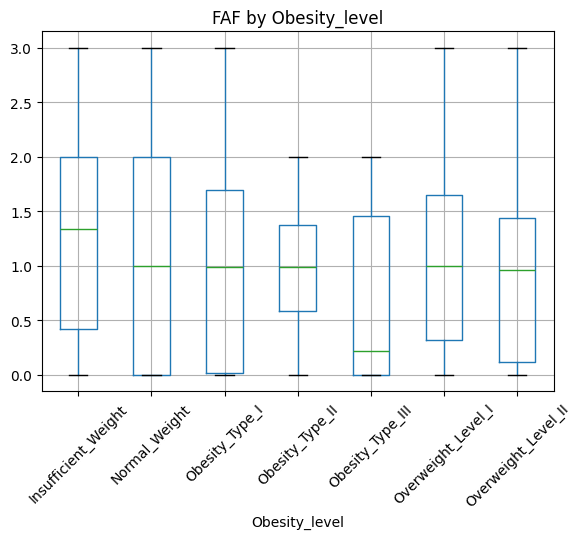

<Figure size 800x500 with 0 Axes>

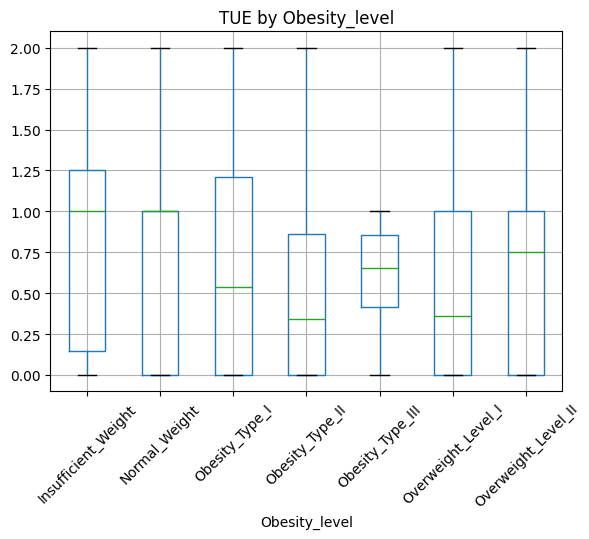

<Figure size 800x500 with 0 Axes>

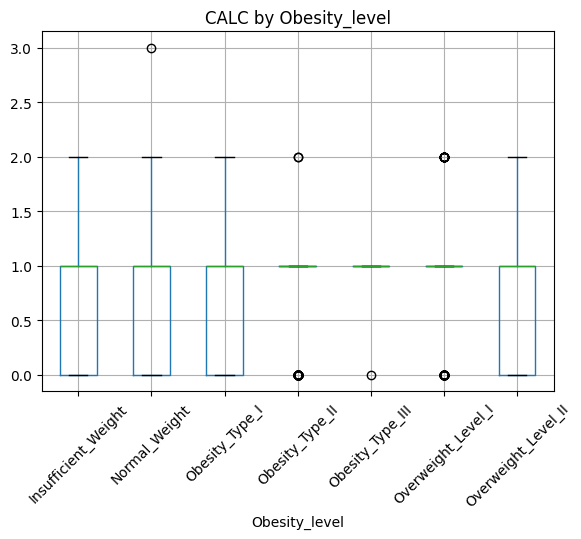

In [16]:
numeric_cols = df7.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    df7.boxplot(column=col, by='Obesity_level')
    plt.title(f"{col} by {'Obesity_level'}")
    plt.suptitle("")
    plt.xticks(rotation=45)

#### 3.2.2. Boxplot of all Numeric Features

Developing this kind of boxplot is useful to inspect the numeric features distributions easily.

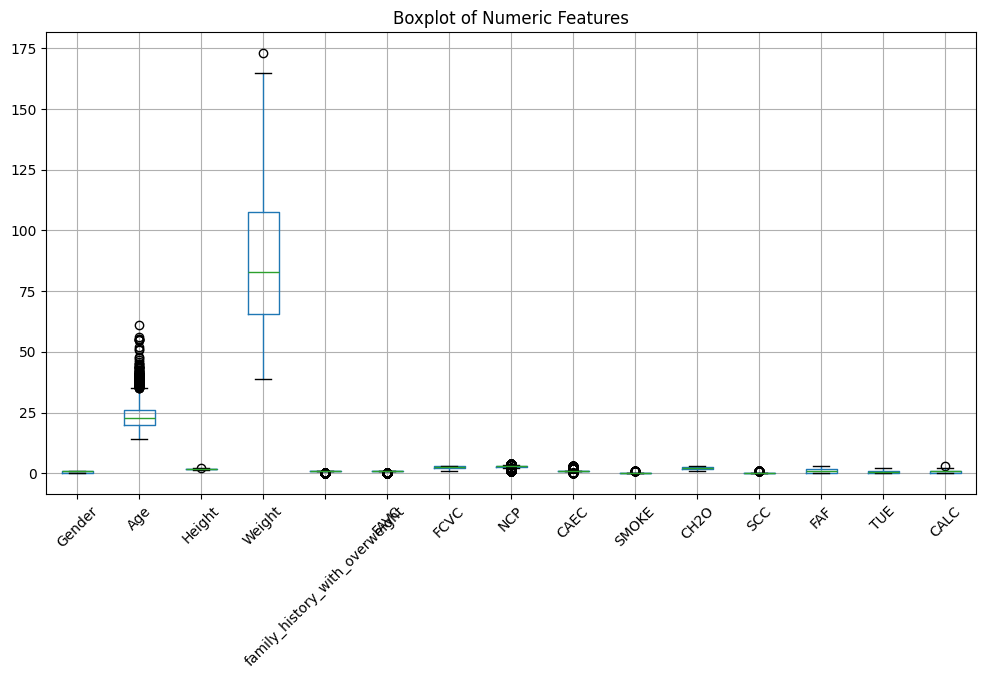

In [17]:
numeric_cols = df7.select_dtypes(include='number')
plt.figure(figsize=(12, 6))
numeric_cols.boxplot()
plt.title(f"Boxplot of Numeric Features")
plt.xticks(rotation=45)
plt.show()

### 2.3. Correlation Matrix

Moving forward, we developed the correlation matrix for our CSV. We reckoned it would have been useful to identify relationships, detect collinearity among features and improve interpretability.

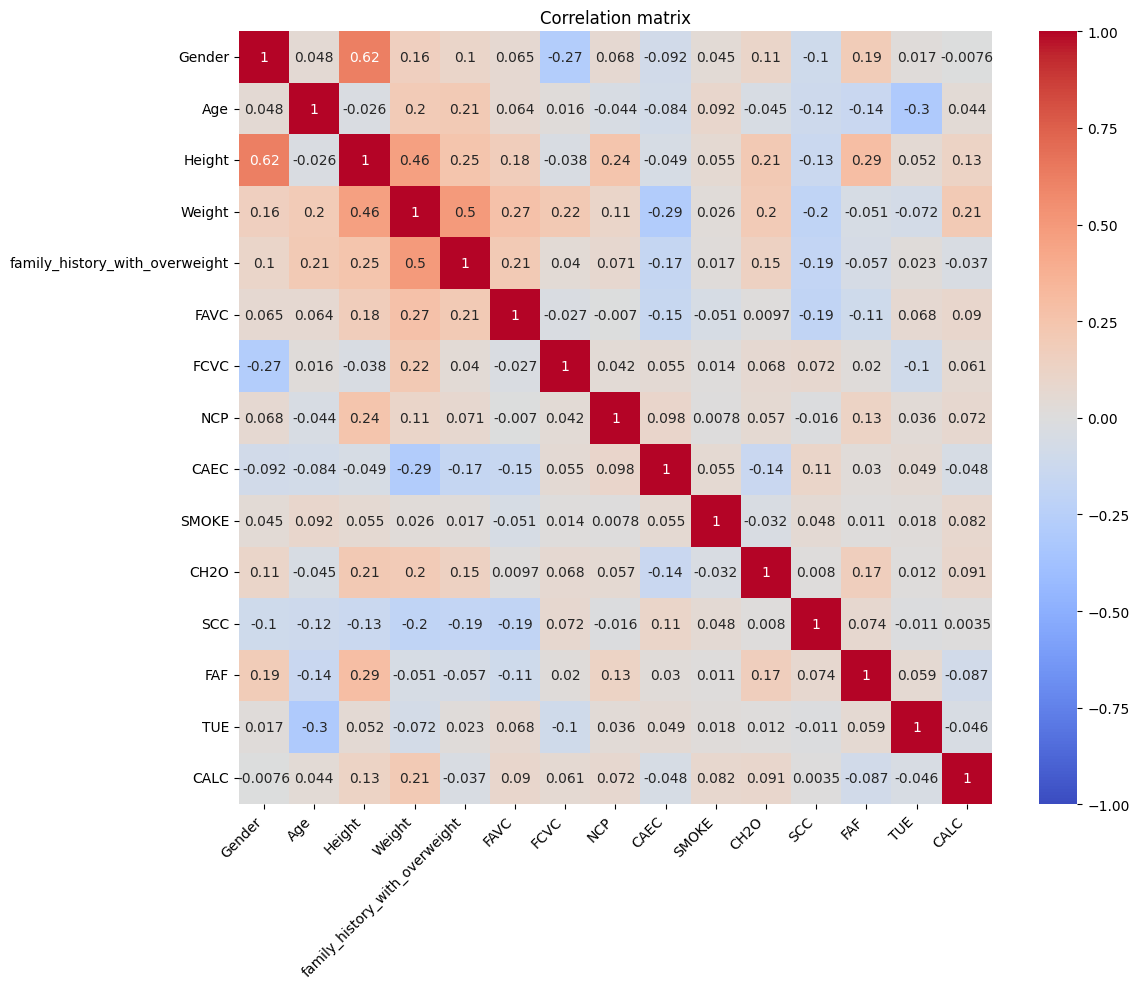

In [18]:
import seaborn as sns
corr=df7.select_dtypes(include='number').corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 4. Modelling

### 4.1. Detection and Handling Outliers

Before moving any forward, we need to check for outliers in our dataset. In case outliers exist, it is important to handle them before splitting and traning the data.

**Step 1:** Identify which are the numeric and categorcial columns.

In [3]:
numeric_cols = df7.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df7.select_dtypes(include=['object', 'category']).columns.tolist()


**Step 2:** Detecting Outliers, IQR Method.

We opted for IQR due to three main reasons:
- Human measured variables (such as height and BMI) aren't distributed normally.
- Works well across different variable scales.
- IQR's robustness when it comes to extreme values.

In [4]:
# We start by defyining our IQR outlier detection function.
def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    mask = (series < lower) | (series > upper)
    return mask, lower, upper

# Next on, we apply the prior function to all the numeric columns in the CSV.
outlier= {}
for col in numeric_cols:
    mask, low, high = iqr_outliers(df7[col])
    outlier[col] = mask.sum()
outlier


{'Gender': np.int64(0),
 'Age': np.int64(168),
 'Height': np.int64(1),
 'Weight': np.int64(1),
 'family_history_with_overweight': np.int64(385),
 'FAVC': np.int64(245),
 'FCVC': np.int64(0),
 'NCP': np.int64(579),
 'CAEC': np.int64(346),
 'SMOKE': np.int64(44),
 'CH2O': np.int64(0),
 'SCC': np.int64(96),
 'FAF': np.int64(0),
 'TUE': np.int64(0),
 'CALC': np.int64(1)}

In [5]:
total_outlier_values = sum(outlier.values())
print(f"Total number of outlier values (outliers per column):", total_outlier_values)

row_outlier_mask = np.zeros(len(df7), dtype=bool)
for col in numeric_cols:
    mask, _, _ = iqr_outliers(df7[col])
    row_outlier_mask |= mask
total_outlier_rows = row_outlier_mask.sum()
print(f"Total number of rows that contain at least one outlier:", total_outlier_rows)

Total number of outlier values (outliers per column): 1866
Total number of rows that contain at least one outlier: 1131


After running the code, we can observe that 10 out of our 15 features contain outliers. Being `NCP` (579), `family_history_with_overweight` (385) and `CAEC` (346) the features containing more outlier values.

 As our dataset has a total of 2118 rows, we discarded removing them as a strategy.

**Step 3:** Handling Outliers, IQR Capping

We decided IQR Capping was the best option for our dataset, as it keeps the rows, prevents the leakege of test information and reduces influences that might be extreme.

In [6]:
df_capped = df7.copy()
for col in numeric_cols:
    mask, low, high = iqr_outliers(df_capped[col])
    df_capped[col] = df_capped[col].clip(lower=low, upper=high)


**Splitting the data**

In [7]:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 0
#We drop weight since it's highly correlated with the target variable, including it would made the prediction essentially trivial
X = df_capped.drop(["Obesity_level", "Weight"], axis=1) 
y = df_capped["Obesity_level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_SEED,stratify=y) #Pa que este equilibrado

**Normalizing the data**

Standarization via Z-score scaling after outlier handling and splitting the data.

In [8]:
numeric_cols = X_train.select_dtypes(include=np.number).columns

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train[numeric_cols])
X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# 4.2. Interpretable Tree-Based Models

## 4.2.1. Decision Tree

To evaluate the model fairly, the dataset is divided into:
- **Training set (75%)**
- **Test set (25%)**

We use `train_test_split` with a fixed `random_state` with seed `RANDOM_SEED=0` to ensure reproducibility.

Separating data prevents overfitting and ensures that performance metrics reflect how well the model generalizes to unseen data.


We first train a simple Decision Tree, with `max_depth=1`, as a baseline model.  

This baseline allows us to compare:
- How well a simple model performs
- How much improvement we gain from hyperparameter tuning
- How Random Forests outperform a single tree

Although Decision Trees are easy to interpret, they tend to overfit when grown deep, so this model serves mainly as a reference point.



0.7424242424242424

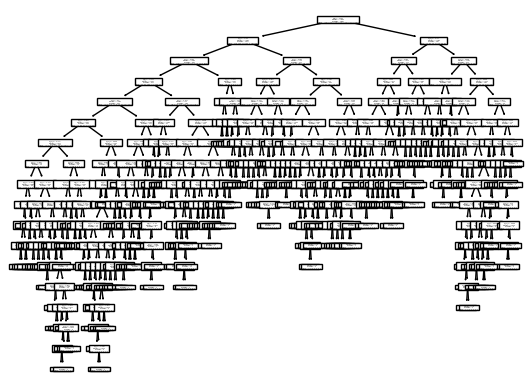

In [25]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

tree_clf = DecisionTreeClassifier(criterion="entropy", random_state=RANDOM_SEED)
tree_clf.fit(X_train, y_train)

_ = tree.plot_tree(tree_clf)

accuracy_score(y_test, tree_clf.predict(X_test))

## 4.2.2. Decision Tree with Hyperparameter Tuning

As said, Decision Trees often overfit, so tuning their hyperparameters is essential.  
We use `GridSearchCV` to automatically test different combinations of:

- **max_leaf_nodes**: controls model complexity by limiting tree size  
- **min_samples_split**: minimum samples required to split a node  

`GridSearchCV` uses 5-fold cross validation (cv=5):
- The training data is split into 5 parts
- The model is trained on 4 parts and validated on the remaining part
- This repeats 5 times
- The average performance is used to choose the best setting

This prevents biased results and selects the most generalizable model.


In [26]:
from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 300)), 'min_samples_split': list(range(2, 20))}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=RANDOM_SEED), params, verbose=1, cv=5)
grid_dt.fit(X_train, y_train)

Fitting 5 folds for each of 5364 candidates, totalling 26820 fits


,estimator,DecisionTreeC...andom_state=0)
,param_grid,"{'max_leaf_nodes': [2, 3, ...], 'min_samples_split': [2, 3, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [27]:
def tree_info(tree_):
    """Print brief insights of the tree."""
    print("depth:", tree_.get_depth(), ", n_leaves:", tree_.get_n_leaves())

print(grid_dt.best_params_)
best_tree_dt = grid_dt.best_estimator_
tree_info(best_tree_dt)

{'max_leaf_nodes': 217, 'min_samples_split': 2}
depth: 14 , n_leaves: 217


In [28]:
y_pred_DT = best_tree_dt.predict(X_test)
accuracy_score(y_test, y_pred_DT)

0.7727272727272727

Accuracy in the hyperparametered decision tree is slightly higher than the baseline, first dicision tree, around 1-2% higher. This increase indicates that controlling the tree’s structure helps reduce overfitting and improves its generalization performance on unseen data.

In [29]:
importances = best_tree_dt.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values("Importance", ascending=False)

print(feat_imp)

                           Feature  Importance
2                           Height    0.169531
5                             FCVC    0.167682
1                              Age    0.162846
12                             TUE    0.150614
6                              NCP    0.091384
13                            CALC    0.068668
11                             FAF    0.064367
9                             CH2O    0.062663
0                           Gender    0.053134
16    MTRANS_Public_Transportation    0.006792
17                  MTRANS_Walking    0.002320
8                            SMOKE    0.000000
10                             SCC    0.000000
7                             CAEC    0.000000
4                             FAVC    0.000000
3   family_history_with_overweight    0.000000
14                     MTRANS_Bike    0.000000
15                MTRANS_Motorbike    0.000000


Feature importance measures how much each feature reduces uncertainty (entropy) across all splits in the tree, providing insight into which variables most strongly influence obesity level classification. Height, age and frequency of vegetable consumption are shown to be the most influential features (and these are consistent with current knowledge about obesity in the real world).

# 4.3. Statistical and Probabilistic Models

### 4.3.1. Logistic Regression Pipeline

Following, as a plus, we decided to implement Logistic Regression Pipeline. The reasoning behind is that our target variable (`Obesity_level`) represents discrete categories, and Logistic Regression is designed for classification.

Instead of a simple Logistic Regression, we believe Logistic Regression Pipeline is a best approach as:
- It prevents data leakage.
- It is cleaner and safer.
- It applies preprocessing in the correct order.

We started by defining once again our numeric and categorical columns. We decided to drop `Obesity_level` as it is our target, not and input feature and in order to prevent data leakage. After all, it is what we are trying to predict.

In [30]:
numeric_cols = X.select_dtypes(include=np.number).columns
X = df_capped.drop(columns=["Obesity_level"])

cat_cols = X.select_dtypes(include=['object', 'category']).columns

Next on, we build our prepocessors. The first one handles numerical features, the second categorical and the third one is in charge pcombining our other two preprocessing steps.

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")),("scaler", StandardScaler())])
categorical_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="most_frequent")),("onehot", OneHotEncoder(handle_unknown="ignore"))])
preprocessor = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_cols),("cat", categorical_transformer, cat_cols)])

Following, we creates our Logistic Regression Pipeline as well as it's training. Basically, we are combining our preprocessing with Logistic Regression in a single pipeline.

In [32]:
from sklearn.linear_model import LogisticRegression
clf = Pipeline(steps=[("preprocessor", preprocessor),("model", LogisticRegression(max_iter=1000))])

clf.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Finally, we can now evaluate the performance of our model. In this way, we will be able to predict obesity class-labels properly via our test dataset.

To do so, we developed the proper code to compute:
- Accuracy.
- Multiclass ROC AUC in a form of One-vs-Rest (OVR).
- Classification report.

In [33]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)

roc_auc = roc_auc_score(y_test,y_proba,multi_class="ovr",average="weighted")

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC (OvR):", roc_auc)
print(classification_report(y_test, y_pred))

Accuracy: 0.48863636363636365
ROC AUC (OvR): 0.8204841377770069
                     precision    recall  f1-score   support

Insufficient_Weight       0.47      0.51      0.49        68
      Normal_Weight       0.30      0.25      0.27        72
     Obesity_Type_I       0.45      0.51      0.48        88
    Obesity_Type_II       0.47      0.74      0.58        74
   Obesity_Type_III       0.80      1.00      0.89        81
 Overweight_Level_I       0.35      0.21      0.26        73
Overweight_Level_II       0.26      0.12      0.17        72

           accuracy                           0.49       528
          macro avg       0.44      0.48      0.45       528
       weighted avg       0.45      0.49      0.46       528



Despite obtaining very contrasting accuracy and ROC AUC (OvR) results, the moderate accuracy illustrates certain multiclass problem (recurrent in health-related datasets) which is expected as classes may overlap and misclassify into neighboring classes.

Still the high value obtained in ROC AUC (OvR) suggests that the model ranks the correct class higher than others. Meaning that it separates classes very well and it is highly informative.

### 4.3.2. Naive-Bayes

Naive Bayes is a probabilistic generative model based on Bayes’ theorem. It is based on the naïve assumption that the features are conditionally independent given the class.

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])

nb_pipeline.fit(X_train, y_train)
y_pred_nb = nb_pipeline.predict(X_test)

The Naive Bayes model is evaluated using accuracy, confusion matrix, and classification report.

In [35]:
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Accuracy: 0.3996212121212121
Confusion Matrix:
 [[55  0  0  6  2  0  5]
 [36  2  0 23  3  0  8]
 [21  1  0 42  0  0 24]
 [ 2  1  0 62  0  0  9]
 [ 0  0  0  0 81  0  0]
 [29  1  0 31  0  0 12]
 [20  1  0 40  0  0 11]]
Classification Report:
                      precision    recall  f1-score   support

Insufficient_Weight       0.34      0.81      0.48        68
      Normal_Weight       0.33      0.03      0.05        72
     Obesity_Type_I       0.00      0.00      0.00        88
    Obesity_Type_II       0.30      0.84      0.45        74
   Obesity_Type_III       0.94      1.00      0.97        81
 Overweight_Level_I       0.00      0.00      0.00        73
Overweight_Level_II       0.16      0.15      0.16        72

           accuracy                           0.40       528
          macro avg       0.30      0.40      0.30       528
       weighted avg       0.30      0.40      0.30       528



/Users/gussemyahia-cheikh/envs/jupyter/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/gussemyahia-cheikh/envs/jupyter/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/gussemyahia-cheikh/envs/jupyter/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

The Naive Bayes classifier achieved a pretty low accuracy, approximately 0.4, on the test set, which is significally lower than both tree-based methods run prior. Yet, this result, far from being decieving, it was expected, as the model relies on the strong assumption of conditional independence between features, which does not hold in real-world datasets. Many lifestyle and physical variables related to obesity are inherently correlated, limiting the model’s predictive performance.

# 4.4. Margin-Based Model

### 4.4.1. Support Vector Machine

We also chose the Support Vector Machine since it's a powerful classifier that it can handle non-linear patterns and works well with high dimensional data.

The selection of the kernel is crucial for SVMs, we picked the Radial Basis Function (RBF). This allows the SVM to capture non-linear relationships by mapping the data into higher dimensions, making it perfect for the complex obesity classification patterns.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

clf_svm=svm.SVC(kernel='rbf', C=1.0, gamma='scale')

In [11]:
from sklearn.metrics import classification_report
clf_svm.fit(X_train_scaled, y_train)
y_pred=clf_svm.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.74      0.82      0.78        68
      Normal_Weight       0.50      0.39      0.44        72
     Obesity_Type_I       0.71      0.75      0.73        88
    Obesity_Type_II       0.75      0.95      0.84        74
   Obesity_Type_III       0.94      1.00      0.97        81
 Overweight_Level_I       0.57      0.60      0.59        73
Overweight_Level_II       0.77      0.50      0.61        72

           accuracy                           0.72       528
          macro avg       0.71      0.72      0.71       528
       weighted avg       0.71      0.72      0.71       528



Unlike tree-based models, the SVMs don't provide a built-in feature importance scores. Instead, we used permutation importance: It randomly shuffles each feature one at the time on the test set and then it measures how much model accuracy drops, those features causing larger drop are more important.

In [38]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(clf_svm, X_test_scaled, y_test, n_repeats=10, random_state=RANDOM_SEED)

importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': perm_importance.importances_mean
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                           Feature  Importance
0                           Gender    0.200189
13                            CALC    0.161364
1                              Age    0.160795
5                             FCVC    0.144318
6                              NCP    0.140530
2                           Height    0.138636
16    MTRANS_Public_Transportation    0.098295
11                             FAF    0.066856
12                             TUE    0.066477
9                             CH2O    0.058902
17                  MTRANS_Walking    0.015720
15                MTRANS_Motorbike    0.005492
14                     MTRANS_Bike    0.003788
10                             SCC    0.000000
8                            SMOKE    0.000000
7                             CAEC    0.000000
4                             FAVC    0.000000
3   family_history_with_overweight    0.000000


# 4.5. Ensemble Methods

## 4.5.1 Random Forest

Random Forest is an ensemble method that combines multiple Decision Trees trained on different subsets of the data. This model typically outperforms individual classifiers while still providing insights through feature importance.

This model greatly reduces overfitting because:

- Each tree sees slightly different data
- Each tree considers only a subset of features when splitting
- The final prediction is based on averaging

Compared to a single tree, Random Forests:
- Generalize better
- Are more robust to noise
- Provide reliable feature importance scores

We train a Random Forest with 200 trees (`n_estimators=200`) for strong predictive performance.


In [39]:
from sklearn.ensemble import RandomForestClassifier

clf_rndbag = RandomForestClassifier(
    n_estimators=200,
    bootstrap=True,
    n_jobs=-1,
    random_state=RANDOM_SEED)

clf_rndbag.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
accuracy_score(y_test, clf_rndbag.predict(X_test))

0.8806818181818182

Next, we measure feature importance, as it reflects:
- How often a feature is chosen for splits across all trees
- How much it reduces impurity when used

This information is crucial because it tells us:
- Which factors most strongly affect obesity level
- Which features could be simplified or removed
- How to interpret the model in context of health and behavior


In [41]:
importances = clf_rndbag.feature_importances_

feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df

,Feature,Importance
1,Age,0.166131
2,Height,0.154155
5,FCVC,0.134189
12,TUE,0.103949
11,FAF,0.102338
9,CH2O,0.098677
6,NCP,0.092212
13,CALC,0.055652
0,Gender,0.054473
16,MTRANS_Public_Transportation,0.030245


Accuracy alone does not reveal which classes the model struggles with. Because of this, we compute:
- **Classification Report**: includes precision, recall, and F1-score for each class

In [42]:
from sklearn.metrics import classification_report

y_pred = clf_rndbag.predict(X_test)

print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.84      0.88        68
      Normal_Weight       0.74      0.81      0.77        72
     Obesity_Type_I       0.89      0.89      0.89        88
    Obesity_Type_II       0.92      0.93      0.93        74
   Obesity_Type_III       1.00      1.00      1.00        81
 Overweight_Level_I       0.88      0.81      0.84        73
Overweight_Level_II       0.82      0.88      0.85        72

           accuracy                           0.88       528
          macro avg       0.88      0.88      0.88       528
       weighted avg       0.88      0.88      0.88       528



These metrics let us evaluate:
- Which obesity levels are hardest to classify
- Whether the model favors certain categories
- Whether the model achieves balanced performance

This step provides a deeper and more honest assessment of the model’s effectiveness.

## 4.5.2. Voting Classifier

A Voting Classifier is used to combine multiple complementary models, including Logistic Regression, Naive Bayes, and Support Vector Machine.

By aggregating predictions from models with different assumptions and decision mechanisms, the ensemble achieves more robust and stable performance than any individual model.


In [43]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

clf_logreg = LogisticRegression(random_state=RANDOM_SEED)
clf_nb = GaussianNB()
clf_svm = SVC(probability=True,random_state=RANDOM_SEED)
clf_rndbag = RandomForestClassifier(random_state=RANDOM_SEED)

The models that will be used in the voting classifier are statistical and probabilistic models (Logistic Regression and Decision Tree Classifier), Support Vector Machine, and Random Forest.

In [44]:
clf_voting_hard = VotingClassifier(
    estimators=[('lr', clf_logreg), ('nb', clf_nb), ('smv', clf_svm), ('rf', clf_rndbag)], voting='hard')
clf_voting_hard.fit(X_train, y_train)

,estimators,"[('lr', ...), ('nb', ...), ...]"
,voting,'hard'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [45]:
clf_voting_soft = VotingClassifier(
    estimators=[('lr', clf_logreg), ('nb', clf_nb), ('smv', clf_svm), ('rf', clf_rndbag)], voting='soft')
clf_voting_soft.fit(X_train, y_train)

,estimators,"[('lr', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True


In [46]:
from typing import List
def compare_classifiers_accuracies(clfs: List[object], X_train, X_test, y_train, y_test):
    """Fit each classifier and compare their accuracies."""
    for clf in clfs:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"{clf.__class__.__name__}:", accuracy_score(y_test, y_pred))

In [47]:
compare_classifiers_accuracies([clf_logreg, clf_nb, clf_svm, clf_rndbag, clf_voting_hard, clf_voting_soft], X_train, X_test, y_train, y_test)

LogisticRegression: 0.509469696969697
GaussianNB: 0.3996212121212121
SVC: 0.7329545454545454
RandomForestClassifier: 0.8825757575757576
VotingClassifier: 0.7234848484848485
VotingClassifier: 0.7291666666666666


Although Voting Classifier improves robustness, it does not maximize accuracy, as it combines weaker models. Random Forest is a highly optimized ensemble method, and out of all the models used, it is the one that performed the best, with the highest accuracy.